In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [12]:
file_path = '/Users/pyaekyitharchaw/Documents/CSCT Project/Data/botswana_bank_customer_churn.csv'
df = pd.read_csv(file_path)

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'First Name', 'Date of Birth',
       'Gender', 'Marital Status', 'Number of Dependents', 'Occupation',
       'Income', 'Education Level', 'Address', 'Contact Information',
       'Customer Tenure', 'Customer Segment',
       'Preferred Communication Channel', 'Credit Score',
       'Credit History Length', 'Outstanding Loans', 'Churn Flag',
       'Churn Reason', 'Churn Date', 'Balance', 'NumOfProducts',
       'NumComplaints'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [15]:
df.head()

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,...,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,...,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,...,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,...,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,...,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,...,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6


In [16]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['age'] = (pd.Timestamp.today()-df['Date of Birth']).dt.days/365

In [17]:
cat_feat = ['Gender', 'Marital Status']
df = pd.get_dummies(df, columns = cat_feat, drop_first=True)

In [18]:
df['Churn Flag'].value_counts()

Churn Flag
0    101546
1     14094
Name: count, dtype: int64

In [19]:
final_df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'First Name', 'Date of Birth','Address', 'Contact Information', 'Churn Date', 'Occupation', 'Education Level', 'Customer Segment', 'Preferred Communication Channel', 'Churn Reason', 'Number of Dependents'], axis = 1)

In [20]:
final_df.head()

,Income,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,age,Gender_Male,Marital Status_Married,Marital Status_Single
0,77710.14,30,397,24,41959.74,0,211359.05,1,0,37.750685,True,False,False
1,58209.87,27,665,10,8916.67,0,30624.76,4,1,25.298630,False,True,False
2,9794.01,14,715,21,43270.54,0,111956.61,2,6,71.339726,False,False,True
3,15088.98,23,747,17,17887.65,0,201187.61,1,0,34.367123,False,False,False
4,60726.56,22,549,25,32686.84,0,60391.24,5,6,33.136986,False,False,False


In [21]:
X = final_df.drop('Churn Flag', axis = 1)
y = final_df['Churn Flag']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Income                  115640 non-null  float64
 1   Customer Tenure         115640 non-null  int64  
 2   Credit Score            115640 non-null  int64  
 3   Credit History Length   115640 non-null  int64  
 4   Outstanding Loans       115640 non-null  float64
 5   Balance                 115640 non-null  float64
 6   NumOfProducts           115640 non-null  int64  
 7   NumComplaints           115640 non-null  int64  
 8   age                     115640 non-null  float64
 9   Gender_Male             115640 non-null  bool   
 10  Marital Status_Married  115640 non-null  bool   
 11  Marital Status_Single   115640 non-null  bool   
dtypes: bool(3), float64(4), int64(5)
memory usage: 8.3 MB


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# 1. Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
print("Logistic Regression")
print(classification_report(y_test, lr_preds))
print(confusion_matrix(y_test, lr_preds))
print("ROC AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:,1]))

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("\nRandom Forest")
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

# 3. XGBoost
xgb_model = XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("\nXGBoost")
print(classification_report(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print("ROC AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))

# 4. LGBM
lgbm_model = LGBMClassifier(max_depth=5, num_leaves=20, class_weight='balanced', boosting_type='gbdt', objective='binary', random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_preds = lgbm_model.predict(X_test)
print("\nLGBM")
print(classification_report(y_test, lgbm_preds))
print(confusion_matrix(y_test, lgbm_preds))
print("ROC AUC:", roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:,1]))


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40576
           1       0.93      1.00      0.96      5680

    accuracy                           0.99     46256
   macro avg       0.96      0.99      0.98     46256
weighted avg       0.99      0.99      0.99     46256

[[40140   436]
 [    0  5680]]
ROC AUC: 0.9999971059350979

Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     40576
           1       0.97      0.91      0.94      5680

    accuracy                           0.99     46256
   macro avg       0.98      0.96      0.97     46256
weighted avg       0.99      0.99      0.99     46256

[[40438   138]
 [  484  5196]]
ROC AUC: 0.9988975174737303


/Users/pyaekyitharchaw/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:59:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     40576
           1       0.95      0.99      0.97      5680

    accuracy                           0.99     46256
   macro avg       0.97      0.99      0.98     46256
weighted avg       0.99      0.99      0.99     46256

[[40259   317]
 [   43  5637]]
ROC AUC: 0.9997281184395411
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8414, number of negative: 60970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1358
[LightGBM] [Info] Number of data points in the train set: 69384, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Star

In [26]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_predict)
print(f"Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9827, Test Accuracy: 0.9804


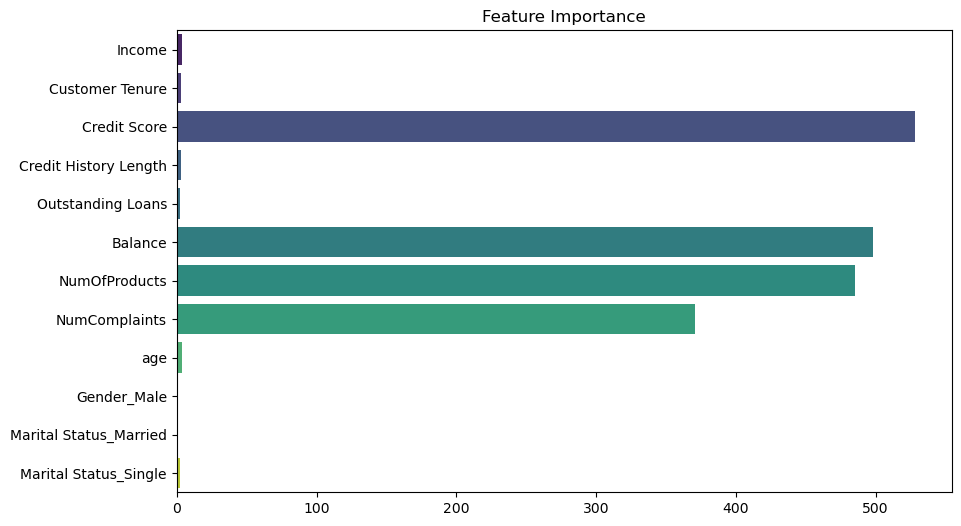

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance")
plt.show()


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11276, number of negative: 81236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1358
[LightGBM] [Info] Number of data points in the train set: 92512, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11275, number of negative: 81237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

In [33]:
# Step 8: Export Model and Scaler
import joblib
joblib.dump(lr_model, 'churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


## CLV

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load your data (example)
#df = pd.read_csv('your_dataset.csv')

# Use the 'Customer Tenure' column directly (if it's in years)
# If it's in months, convert it to years by dividing by 12
# df['Customer Tenure'] = df['Customer Tenure'] / 12  # Uncomment if tenure is in months

# Derive 'Revenue' (simplified version, assuming 'Balance' and 'NumOfProducts' contribute to revenue)
df['Revenue'] = df['Balance'] * df['NumOfProducts']

# Train churn prediction model (using features like 'Income', 'Customer Tenure', 'NumOfProducts')
churn_model = RandomForestClassifier()
churn_model.fit(df[['Income', 'Customer Tenure', 'NumOfProducts']], df['Churn Flag'])

# Predict churn probabilities
df['Churn Probability'] = churn_model.predict_proba(df[['Income', 'Customer Tenure', 'NumOfProducts']])[:, 1]

# Calculate CLV (simplified version using 'Revenue', 'Customer Tenure', and 'Churn Probability')
df['CLV'] = df['Revenue'] * (df['Customer Tenure'] * (1 - df['Churn Probability']))

# Display the result
print(df[['CustomerId', 'CLV']])
